In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("C:\pandas\salary.csv")
print(df)

       company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     b

In [4]:
inputs=df.drop('salary_more_then_100k',axis='columns')

In [5]:
target=df['salary_more_then_100k']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_company=LabelEncoder()

In [8]:
le_job=LabelEncoder()

In [9]:
le_degree=LabelEncoder()

In [10]:
inputs['company_n']=le_company.fit_transform(inputs['company'])

In [11]:
inputs["job_n"]=le_job.fit_transform(inputs['job'])

In [12]:
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])
print(inputs)

       company                  job     degree  company_n  job_n  degree_n
0       google      sales executive  bachelors          2      2         0
1       google      sales executive    masters          2      2         1
2       google     business manager  bachelors          2      0         0
3       google     business manager    masters          2      0         1
4       google  computer programmer  bachelors          2      1         0
5       google  computer programmer    masters          2      1         1
6   abc pharma      sales executive    masters          0      2         1
7   abc pharma  computer programmer  bachelors          0      1         0
8   abc pharma     business manager  bachelors          0      0         0
9   abc pharma     business manager    masters          0      0         1
10    facebook      sales executive  bachelors          1      2         0
11    facebook      sales executive    masters          1      2         1
12    facebook     busine

In [13]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n
print(target)

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64


In [15]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [18]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n,target)

1.0

In [20]:
model.predict([[2,1,0]])

array([0], dtype=int64)

In [21]:
model.predict([[2,1,1]])

array([1], dtype=int64)

RANDOMFOREST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\pandas\diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [24]:
df=pd.read_csv("C:\pandas\diabetes.csv")
print(df.shape)

(768, 9)


In [25]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
from sklearn.model_selection import train_test_split

In [48]:
x=df.iloc[:,df.columns!="Outcome"]
y=df.iloc[:,df.columns=="Outcome"]


In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [53]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
345,8,126,88,36,108,38.5,0.349,49
418,1,83,68,0,0,18.2,0.624,27
179,5,130,82,0,0,39.1,0.956,37
230,4,142,86,0,0,44.0,0.645,22
643,4,90,0,0,0,28.0,0.610,31


In [54]:
ytrain.head()

,Outcome
345,0
418,0
179,1
230,1
643,0


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model=RandomForestClassifier()

In [58]:
model.fit(xtrain,ytrain.values.ravel())

RandomForestClassifier()

In [59]:
predictoutput=model.predict(xtest)
print(predictoutput)

[0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 0 1]


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
acc=accuracy_score(predictoutput,ytest)
print("accuracy of the above dta set of diabetes is:",acc)

accuracy of the above dta set of diabetes is: 0.7575757575757576


k-means

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotib inline

UsageError: Line magic function `%matplotib` not found.


In [13]:
df=pd.read_csv("C:\pandas\heart.csv")
print(df)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

In [14]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


KMeans(n_clusters=2)


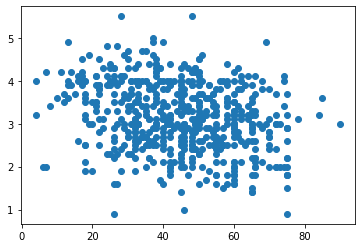

In [17]:
plt.scatter(df["Age"],df["Albumin"])
km=KMeans(n_clusters=2)
print(km)

In [19]:
ypredicted=km.fit_predict(df[["Age","Albumin"]])
print(ypredicted)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 

In [21]:
df["HeartDisease"]=ypredicted
print(df.head())

   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  HeartDisease  
0      3.3                        0.90        1             0  
1      3.2        

No handles with labels found to put in legend.


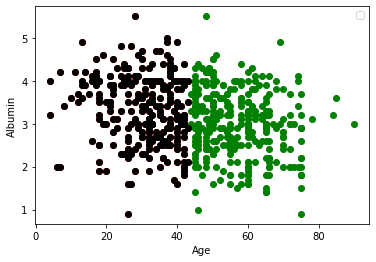

In [25]:
df1=df[df.HeartDisease==0]
df2=df[df.HeartDisease==1]
df3=df[df.HeartDisease==1]
plt.scatter(df1.Age,df1["Albumin"],color="green")
plt.scatter(df2.Age,df2["Albumin"],color="red")
plt.scatter(df3.Age,df3["Albumin"],color="black")
plt.xlabel("Age")
plt.ylabel("Albumin")
plt.legend()

In [7]:
scaler=MinMaxScaler()
scaler.fit(df["Albumin"])
df["Albumin"]=scaler.transform(df["Albumin"])
print(df)
scaler.fit(df.Age)
df.Age=scaler.transform(df.Age)
print(df.Age)

NameError: name 'df' is not defined

In [33]:
km=KMeans(n_clusters=2)
ypredicted=km.fit_predict(df[["Age","Albumin"]])
print(ypredicted)

[1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 1 1 1 0 0 

In [34]:
df["HeartDisease"]=ypredicted
df.drop("HeartDisease",axis="columns",inplace=True)
print(df)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

In [36]:
km.cluster_centers_

array([[30.48529412,  3.32058824],
       [57.21864952,  2.98553055]])

In [10]:
krange=range(1,10)
a=[]
for K in range(1,10):
    km=KMeans(n_clusters=K)
    km.fit(df[["Age","Albumin"]])
    a.append(km.inertia_)
    print(a)

NameError: name 'df' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

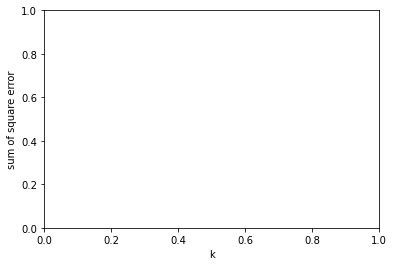

In [45]:
plt.xlabel('k')
plt.ylabel("sum of square error")
plt.plot(krange,a)